# Predicting Survival on Titanic

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Titanic ML Disaster/Train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

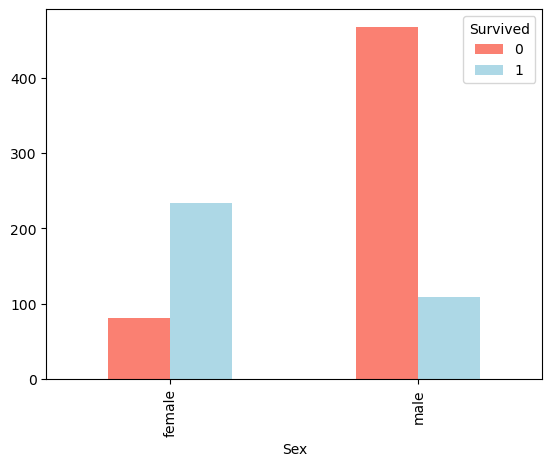

In [7]:
pd.crosstab(data.Sex, data.Survived).plot(kind="bar", color=["salmon", "lightblue"]);

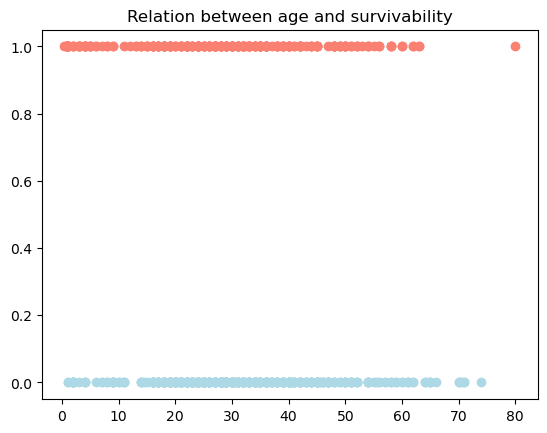

In [8]:
plt.scatter(data["Age"][data["Survived"] == 1],
            data["Survived"][data["Survived"] == 1],
            color="salmon")

plt.scatter(data["Age"][data["Survived"] == 0],
            data["Survived"][data["Survived"] == 0],
            color="lightblue")

plt.title("Relation between age and survivability");

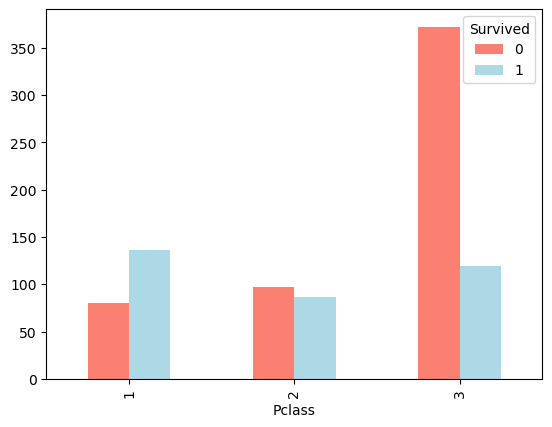

In [9]:
pd.crosstab(data["Pclass"], data["Survived"]).plot.bar(color=["salmon", "lightblue"]);

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data_copy = data.copy()

In [12]:
for label, content in data_copy.items():
    if pd.api.types.is_object_dtype(content):
        data_copy[label] = content.astype('category').cat.as_ordered()

In [13]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [14]:
for label, content in data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data_copy[label+"_is_missing"] = pd.isnull(content)
            data_copy[label] = data_copy[label].fillna(content.median())

In [15]:
for label, content in data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [16]:
for label, content in data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Cabin
Embarked


In [17]:
for label, content in data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        data_copy[label+"_is_missing"] = pd.isnull(content)
        data_copy[label] = pd.Categorical(content).codes + 1

In [18]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    int16  
 4   Sex                  891 non-null    int8   
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    int16  
 9   Fare                 891 non-null    float64
 10  Cabin                891 non-null    int16  
 11  Embarked             891 non-null    int8   
 12  Age_is_missing       891 non-null    bool   
 13  Name_is_missing      891 non-null    bool   
 14  Sex_is_missing       891 non-null    bool   
 15  Ticket_is_missing    891 non-null    boo

In [19]:
from sklearn.model_selection import train_test_split

X = data_copy.drop("Survived", axis=1)
y = data_copy["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_jobs=-1,
    random_state=42)

clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [21]:
clf.score(X_val, y_val)

0.8156424581005587

In [22]:
clf.predict(X_val)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1])

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_val, y_val, cv=5)

array([0.77777778, 0.66666667, 0.83333333, 0.72222222, 0.85714286])

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

grid = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [None, 10, 20, 5],
    "min_samples_split": [2, 5, 7, 10],
    "max_features": ["sqrt", "log2"]
}

rs_clf = RandomizedSearchCV(
    RandomForestClassifier(
        n_jobs=-1,
        random_state=42
    ),
    param_distributions=grid,
    n_iter=5,
    cv=5,
    verbose=True
)

In [25]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 10, 20, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=True)

In [26]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 5}

In [27]:
rs_clf.score(X_val, y_val)

0.8044692737430168

In [28]:
gs_clf = GridSearchCV(
    RandomForestClassifier(
        n_jobs=-1,
        random_state=42
    ),
    param_grid=grid,
    cv=5,
    verbose=True
)

In [29]:
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 10, 20, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=True)

In [30]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 100}

In [31]:
gs_clf.score(X_val, y_val)

0.8100558659217877

In [32]:
clf.score(X_val, y_val)

0.8156424581005587

In [33]:
clf.score(X_train, y_train)

1.0

In [34]:
test_data = pd.read_csv("Titanic ML Disaster/test.csv")

In [35]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_data[label+"_is_missing"] = pd.isnull(content)
            test_data[label] = test_data[label].fillna(content.median())

In [38]:
for label, content in test_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_data[label+"_is_missing"] = pd.isnull(content)
        test_data[label] = pd.Categorical(content).codes + 1

In [39]:
test_data.isna().sum()
test_data = test_data.drop("Fare_is_missing", axis=1)

In [40]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    int16  
 4   Sex                  891 non-null    int8   
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    int16  
 9   Fare                 891 non-null    float64
 10  Cabin                891 non-null    int16  
 11  Embarked             891 non-null    int8   
 12  Age_is_missing       891 non-null    bool   
 13  Name_is_missing      891 non-null    bool   
 14  Sex_is_missing       891 non-null    bool   
 15  Ticket_is_missing    891 non-null    boo

In [41]:
test_preds = gs_clf.predict(test_data)

In [42]:
submissions = pd.DataFrame(columns=["PassengerID", "Survived"])

In [43]:
submissions.head()

,PassengerID,Survived


In [44]:
submissions["PassengerID"] = test_data["PassengerId"]
submissions["Survived"] = test_preds

In [45]:
submissions.head()

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [46]:
submissions.to_csv("submission.csv", index=False)

In [47]:
from sklearn.svm import LinearSVC

svc = LinearSVC(
    random_state=42
)

svc.fit(X_train, y_train)

LinearSVC(random_state=42)

In [48]:
svc.score(X_val, y_val)

0.776536312849162

In [53]:
grid = {
    "penalty": ["l1", "l2"],
    'C': [0.1, 1, 10, 100, 1000],

}

gs_clf = GridSearchCV(
    LinearSVC(
        random_state=42
    ),
    param_grid=grid,
    n_jobs=-1,
    cv=5,
    verbose=True
)

In [54]:
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             verbose=True)

In [55]:
gs_clf.score(X_val, y_val)

0.7821229050279329